# A Visual Introduction to Sampling with `LinConGauss`

### Outline
This notebook shows how to use the `LinConGauss` package to sample from a linearly constrained Gaussian.
The example uses three linear constraints in 2 dimensions (for visualization purposes).

Details on the method can be found in [Gessner, Kanjilal, and Hennig: Integrals over Gaussians under Linear Domain Constraints](https://arxiv.org/abs/1910.09328)

_tutorial by Alexandra Gessner, Feb 2020_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import LinConGauss as lcg

plt.rcParams['figure.figsize'] = (10, 8.0)

### Setting up linear constraints
The linear constraints are defined as the roots of $M$ (here `n_lc`) linear functions
$$\mathbf{f}(\mathbf{x}) = A_m^\intercal \mathbf{x} + \mathbf{b}. $$
and the domain of interest is defined as the intersection of where all these functions are _positive_.

In [20]:
# Problem dimension
dim = 2

# seed for reproducibility
np.random.seed(0)

# number of linear constraints
n_lc = 3

# generate random linear constraints
A = np.asarray([[2, 1],[2, -1],[-1, -1]])
b = np.asarray([[-0.2], [-0.5], [0.5]])

# define the linear constraints with LinConGauss
lincon = lcg.LinearConstraints(A=A, b=b)

### Sampling
The sampler builds on elliptical slice sampling, treating the domain as a 0-1 likelihood.
If a point in the domain is known already, it can be handed to the sampler through `x_init`.
Otherwise, the sampler will search an initial location within the domain by drawing from the underlying standard normal distribution.
If an `x_init` is not known, but the probability of the domain is very low, one can find an initial sample using subset simulation.

In [14]:
# Sample
sampler = lcg.sampling.EllipticalSliceSampler(2500, lincon, 1)

[EllipticalSliceSampler] searching x_init
[EllipticalSliceSampler] found x_init


In [15]:
sampler.run()

For the purpose of plotting (relevant only in 2D), we define a little helper function that finds the roots of the linear functions.

In [16]:
# linear constraints
def lincon_root_2d(x, a, b):
    """ Line where one linear constraint ax + b = 0 as a function of x"""
    return -(a[0]*x + b)/a[1]

(-1, 1)

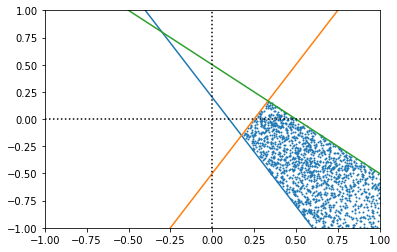

In [17]:
xx = np.linspace(-1,1,100)

fig, ax = plt.subplots(1,1)
for i in range(n_lc):
    ax.plot(xx, lincon_root_2d(xx, lincon.A[i,:], lincon.b[i]))
ax.scatter(sampler.loop_state.X[0,:], sampler.loop_state.X[1,:], s=1)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)